#**Analytics Twitter Sentiment Analysis - Logistic Regression - Code Review**

https://youtu.be/Xh6wFH3Fh7Q

https://github.com/TracyRenee61/Identify-the-Sentiment/blob/master/Analytics%20Identify%20the%20Sentiments%20-%20Log%20Reg.ipynb

In [1]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
#load files:-
train  = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/train_2kmZucJ.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/test_oJQbWVk.csv')
sample_sub=pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-the-Sentiment/master/sample_submission_LnhVWA4.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
sample_sub.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [6]:
combi = train.append(test, ignore_index=True)

In [7]:
#Contractions Dictionary
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
#contractions_dict

In [8]:
# Reading contractions.csv and storing it as a dict.
# contractions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contractions.csv', index_col='Contraction')
# contractions.index = contractions.index.str.lower()
# contractions.Meaning = contractions.Meaning.str.lower()
# contractions_dict = contractions.to_dict()['Meaning']

# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"



# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

def preprocess_apply(tweet):

    tweet = tweet.lower()
    
    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)


#     for contraction, replacement in contractions_dict.items():
#         tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet

In [9]:
combi['tidy_tweet'] = combi.tweet.apply(preprocess_apply)
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test <url> android a...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,am wired i know am george i was made that ...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",samsunggalaxynote7 explodes burns 6 year old...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,now available hoodie check it out here <u...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes a crack right across the screen if...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,<user> as i said adobe big time we may well a...


In [10]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi

<ipython-input-10-aa379726577e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test url android a...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,am wired i know am george i was made that ...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",samsunggalaxynote explodes burns year old...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,now available hoodie check it out here u...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes a crack right across the screen if...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,user as i said adobe big time we may well a...


In [11]:
#remove words with length of 3 or less as they might be stopwords and doesn't convery much meaning
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would talk makememories unplug relax...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made that smile iphone cute ...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple will even talk abou...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",samsunggalaxynote explodes burns year thanks r...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check here iphone case music ...
9870,9871,NaN,There goes a crack right across the screen. If...,there goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,user said adobe time well include apple


In [12]:
# #spelling correction with text blob library
# train['processed_tweet'] = train['processed_tweet'].apply(lambda x: str(TextBlob(x).correct()))
# train

In [13]:
#tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, this, would, talk, makememories, unplug...
3       [wired, know, george, made, that, smile, iphon...
4       [what, amazing, service, apple, will, even, ta...
                              ...                        
9868    [samsunggalaxynote, explodes, burns, year, tha...
9869    [available, hoodie, check, here, iphone, case,...
9870    [there, goes, crack, right, across, screen, co...
9871      [user, said, adobe, time, well, include, apple]
9872    [finally, thanx, father, samsung, galaxy, gift...
Name: tidy_tweet, Length: 9873, dtype: object

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0       [fingerprint, pregnanc, test, android, app, be...
1       [final, transpar, silicon, case, thank, uncl, ...
2       [love, thi, would, talk, makememori, unplug, r...
3       [wire, know, georg, made, that, smile, iphon, ...
4       [what, amaz, servic, appl, will, even, talk, a...
                              ...                        
9868    [samsunggalaxynot, explod, burn, year, thank, ...
9869    [avail, hoodi, check, here, iphon, case, music...
9870    [there, goe, crack, right, across, screen, cou...
9871         [user, said, adob, time, well, includ, appl]
9872    [final, thanx, father, samsung, galaxi, gift, ...
Name: tidy_tweet, Length: 9873, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test android app beauti c...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl smile s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would talk makememori unplug relax ip...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that smile iphon cute dav...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl will even talk about que...
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",samsunggalaxynot explod burn year thank rush y...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,avail hoodi check here iphon case music discount
9870,9871,NaN,There goes a crack right across the screen. If...,there goe crack right across screen could actu...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,user said adob time well includ appl


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Vectorization technique: Bag of words**

In [17]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') #Vectorization technique: Bag of words
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [18]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
#create logistic regression
lreg = LogisticRegression()
#create hyper parameters
penalty=['l1', 'l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C, penalty=penalty)

#fit the model
best_model=lreg.fit(xtrain_bow, ytrain) # training the model

In [19]:
best_model.predict(test_bow)
best_model

LogisticRegression()

In [20]:
prediction = best_model.predict_proba(xvalid_bow) # predicting on the validation set
#print(prediction)
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
#print(prediction_int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.778393351800554

In [21]:
test_pred = best_model.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
print(submission)
print()
print(f1_score(test[['label']], test_pred_int))

        id  label
0     7921      1
1     7922      1
2     7923      1
3     7924      1
4     7925      1
...    ...    ...
1948  9869      0
1949  9870      0
1950  9871      1
1951  9872      1
1952  9873      0

[1953 rows x 2 columns]

1.0


**Vectorization technique: Tf-Idf**

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [23]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

best_model = lreg.fit(xtrain_tfidf, ytrain)

prediction = best_model.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7910863509749303

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*

*----------------------------------------------------------------------------*


#**Classification of Twitter data using Logistic Regression | Machine Learning**

https://youtu.be/FD1l_z9EZIE

#Importing modules and reading the dataset

In [224]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [225]:
df = pd.read_csv('https://raw.githubusercontent.com/crwong/cs224u-project/master/data/sentiment/training.1600000.processed.noemoticon.csv', 
                   encoding = 'ISO-8859-1',
                   names= ['target','id','date','flag','user','text'])
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [226]:
print(df.shape)
print()
print(df.info())

(20000, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  int64 
 1   id      20000 non-null  int64 
 2   date    20000 non-null  object
 3   flag    20000 non-null  object
 4   user    20000 non-null  object
 5   text    20000 non-null  object
dtypes: int64(2), object(4)
memory usage: 937.6+ KB
None


In [227]:
df.target.unique()

array([0, 4])

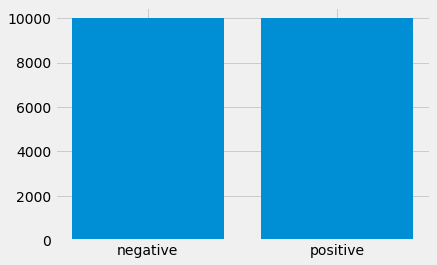

In [228]:
classes = df.target.unique()
counts = []
for i in classes:
  count = len(df[df.target == i])
  counts.append(count)

plt.bar(['negative','positive'],counts)
plt.show()

#The data is balanced as classes are equally distributed

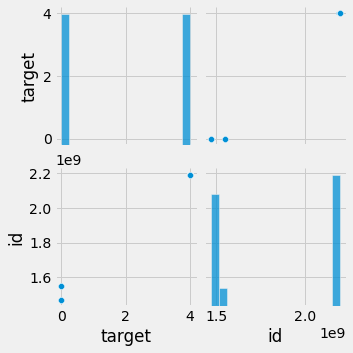

In [229]:
 sb.pairplot(df)

#Preprocessing

In [230]:
#Contractions Dictionary
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
#contractions_dict

In [231]:
# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

def preprocess_apply(tweet):

    tweet = tweet.lower()
    
    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)

#     for contraction, replacement in contractions_dict.items():
#         tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet

In [232]:
df['processed_text'] = df.text.apply(preprocess_apply)
df

,target,id,date,flag,user,text,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",<user> <url> aww that has that is a bumme...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,<user> i dived many times for the ball manage...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",<user> no it has it is not behaving at all ...
...,...,...,...,...,...,...,...
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best fee...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com very cool to hear old walt interv...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me f...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of all time tu...


In [233]:
df['processed_text'] = df['processed_text'].str.replace("[^a-zA-Z#]", " ")
df

<ipython-input-233-470dbdccf33c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['processed_text'].str.replace("[^a-zA-Z#]", " ")


,target,id,date,flag,user,text,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",user url aww that has that is a bumme...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,user i dived many times for the ball manage...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",user no it has it is not behaving at all ...
...,...,...,...,...,...,...,...
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best fee...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com very cool to hear old walt interv...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me f...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of all time tu...


In [234]:
i = df['processed_text'][0]
s = ""
j = i.split(" ")
print(j)
l = []
for i in j:
  if len(i)>=1:
    l.append(i)
print(l)

for i in l:
  if i != '':
    s = s+' '+i
  
s = s[1:]

print('\n')
print(s)

['', 'user', '', '', 'url', '', '', '', 'aww', '', 'that', 'has', '', '', 'that', 'is', 'a', 'bummer', '', '', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '', '', 'smile', '']
['user', 'url', 'aww', 'that', 'has', 'that', 'is', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'smile']


user url aww that has that is a bummer you shoulda got david carr of third day to do it smile


In [235]:
def removing_unnecessary_gaps(tweet):

  i = tweet
  s = ""
  j = i.split(" ")
  #print(j)
  l = []
  for i in j:
    if len(i)>=1:
      l.append(i)
  #print(l)

  for i in l:
    if i != '':
      s = s+' '+i
  s = s[1:]
  # print('\n')
  # print(s)
  
  return s

In [236]:
df['processed_text'] = df.processed_text.apply(removing_unnecessary_gaps)
df

,target,id,date,flag,user,text,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",user url aww that has that is a bummer you sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,user i dived many times for the ball managed t...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",user no it has it is not behaving at all am ma...
...,...,...,...,...,...,...,...
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com very cool to hear old walt intervie...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of all time tupac ...


In [237]:
df['processed_text'][0]

'user url aww that has that is a bummer you shoulda got david carr of third day to do it smile'

In [238]:
import re
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

s = x_train[0]
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]",s)if w)

for i in s.split():
  if len(i) > 1 :
    print(i,vectorizer.vocabulary_[i.lower()])

part 10697
two 15484
of 10258
my 9721
hp 6961
saga 12605
black 1482
cartridge 2301
bought 1740
way 16149
back 1019
dried 4300
out 10483
since 13267
could 3245
not 10114
actually 138
use 15749
it 7519
in 7235
my 9721
printer 11431
gone 6087


To see each of the word in the tweet and it's index in the vocabulary

In [239]:
print('First tweet: \n')
print(f'Before vectorizintg: {x_train[0]} \n \n After vectorizing: \n{X_train[0]}')

First tweet: 

Before vectorizintg: part two of my hp saga black cartridge i bought way back dried out since i could not actually use it in my printer gone 
 
 After vectorizing: 
  (0, 138)	1
  (0, 1019)	1
  (0, 1482)	1
  (0, 1740)	1
  (0, 2301)	1
  (0, 3245)	1
  (0, 4300)	1
  (0, 6087)	1
  (0, 6961)	1
  (0, 7235)	1
  (0, 7519)	1
  (0, 9721)	2
  (0, 10114)	1
  (0, 10258)	1
  (0, 10483)	1
  (0, 10697)	1
  (0, 11431)	1
  (0, 12605)	1
  (0, 13267)	1
  (0, 15484)	1
  (0, 15749)	1
  (0, 16149)	1


#Splitting the data

In [240]:
x = df.processed_text.values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

#Vectorize

In [241]:
x = df.processed_text.values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)



vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)


The vectorized data will consist of index of each word that is used in the training dataset

Here, we get the index numbers of each word in the particular tweet and frequency of each word. 

In [242]:
print('First tweet: \n')
print(f'Before vectorizintg: {x_train[0]} \n \n After vectorizing: \n{X_train[0]}')

First tweet: 

Before vectorizintg: part two of my hp saga black cartridge i bought way back dried out since i could not actually use it in my printer gone 
 
 After vectorizing: 
  (0, 138)	1
  (0, 1019)	1
  (0, 1482)	1
  (0, 1740)	1
  (0, 2301)	1
  (0, 3245)	1
  (0, 4300)	1
  (0, 6087)	1
  (0, 6961)	1
  (0, 7235)	1
  (0, 7519)	1
  (0, 9721)	2
  (0, 10114)	1
  (0, 10258)	1
  (0, 10483)	1
  (0, 10697)	1
  (0, 11431)	1
  (0, 12605)	1
  (0, 13267)	1
  (0, 15484)	1
  (0, 15749)	1
  (0, 16149)	1


#Building the model

In [243]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Hear explanation of this video 

https://youtu.be/FD1l_z9EZIE  [7.00-9.00]

In [244]:
score = classifier.score(X_test,y_test)
print(f'Accuracy: {score}')

Accuracy: 0.7655


In [245]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred,labels = df.target.unique())
df_cm = pd.DataFrame(cm,index = ['Negative','Positive'],columns= ['Negative','Positive'])
df_cm

,Negative,Positive
Negative,1496,522
Positive,416,1566


#Testing

In [248]:
tweet = 'ah, congrats mr fletcher for finally joining twitter'
vectTweet = vectorizer.transform(np.array([tweet]))
prediction = classifier.predict(vectTweet)
if prediction[0] == 4: print('Positive') 
else: print('Negative')

Positive


In [249]:
tweet = 'Mondays are worst'
vectTweet = vectorizer.transform(np.array([tweet]))
prediction = classifier.predict(vectTweet)
if prediction[0] == 4: print('Positive') 
else: print('Negative')

Negative
